# PC Lab 2: Nearest neighbour and data preprocessing
Predictive modelling


## Introduction
In our previous lab session, we explored the iris dataset. In this dataset, there are no missing values in the variable "Species". But what if there are new observations without a value in the "Species" variable? So, imagine the case that for a 'new' iris flower we know the values for the other columns (sepal/petal length and height) but
it is unknown to which of the three species it belongs to (dataset irisNA.csv). A natural task would be
to try to guess to which species each of the new flowers belongs to. This task
(or problem) is called a classification problem in machine learning. In this practical exercise session, a first
simple algorithm that provides an answer to this problem is described.
### Notations and vocabulary
In the iris dataset (iris120.csv), each instance (each flower is an instance) is described by five properties:
the species it belongs to, the width of its petals, the length of its petals, the width of its sepals and the
length of its sepals. In this PC-lab, for simplicity, only species, sepal length and sepal width will be used.
These properties can be seen as variables, and for a given flower, each of these variables takes a specific
value. In a classification setting, the aim is to predict the value of one of the variables (here the species),
based on the value of the other variables (here petal width and length). The variable of which the values
have to be predicted is called the output variable and the variables used to make this prediction are called
the input variables or features. A dataset consists of a set of observations of input-output couples $(\boldsymbol{x}, y)$. In this dataset, the observed values
for the features of the $i$-th instance are denoted $\boldsymbol{x_i}$ $= (x_{i1}, ... , x_{ip})^T$ , where $p$ the number of features, and the observed value of its output
is denoted $y_i$. Using this notation, a training dataset $T$ containing $n$ instances can be written as $$T = \{(\boldsymbol{x_1}, y_1), ... , (\boldsymbol{x_n}, y_n)\}.$$
Using this dataset, we will try to build a model (generally denoted $f$) that is able to predict the value of the
output variable, based on the value of the input variables. When this output variable is nominal, this process
is called a classification problem.    
In the iris problem, both input variables take real values $(\boldsymbol{x_i} \in \mathbb{R}^2)$. The output variable, however, is
nominal, it takes values from a finite set $\{setosa, versicolor, virginica\}$. Because of this, the model $\textit{f}$ we are
looking for is one which performs a mapping $$\textit{f} : \mathbb{R}^2 \rightarrow  \{setosa, versicolor, virginica\}.$$   
### Nearest neighbour for classification
Several techniques exist that are capable of deriving classification models from data. A very simple one is
the nearest neighbour model. This model departs from the assumption that instances whose features are
highly similar, are likely to have the same labels. The one nearest neighbour (1-NN) model applies this
idea in its most extreme form: the label for an instance (with unknown label) is predicted as the label of the
closest instance in the training dataset.   
To be able to select the ‘closest’ instance in the training dataset, a distance measure has to be defined. In
this text, we will use $d(\boldsymbol{x_i}, \boldsymbol{x_j})$ to denote the distance between two feature vectors $\boldsymbol{x_i}$ and $\boldsymbol{x_j}$. As a simple
distance measure, the Euclidean distance can be used
$$d_E(\boldsymbol{x_i}, \boldsymbol{x_j}) = \sqrt{\sum_{k=1}^{p} (x_{i,k} - x_{j,k})^2}$$
Using this distance function, the nearest neighbour algorithm performs the following steps:
1. For an instance with unknown label and known feature vector $\boldsymbol{x}$, calculate the distance to each instance in the dataset: $d_E(\boldsymbol{x}, \boldsymbol{x_i})$ where $i = 1, ... ,n.$
2. Select the closest instance and take its label as the prediction for the unknown label.

This first codeblock downloads all the necessary data for this pc-lab.

In [ ]:
!wget https://raw.githubusercontent.com/BioML-UGent/MLLS/main/02_knn/abalone.csv
!wget https://raw.githubusercontent.com/BioML-UGent/MLLS/main/02_knn/iris120.csv
!wget https://raw.githubusercontent.com/BioML-UGent/MLLS/main/02_knn/irisNA.csv

('abalone.csv', <http.client.HTTPMessage at 0x7ff79edcbe50>)


<div class="alert alert-success">

<b>EXERCISE</b>: **Load the dataset iris120.csv in to the memory and select the columns 'Sepal.Length', 'Sepal.Width', and 'Species'. Additionally, load the set of unclassified
instances (irisNA.csv) and select the same columns. Both datasets should be loaded as data frames. **
</div>


In [ ]:
import numpy as np
import pandas as pd

iris120 = pd.read_csv('iris120.csv') # ... load in dataset iris120.csv
iris120 = iris120[['Sepal.Length', 'Sepal.Width', 'Species']] # ... select the right columns

irisNA = pd.read_csv('irisNA.csv') # ... repeat for irisNA.csv
irisNA = irisNA[['Sepal.Length', 'Sepal.Width', 'Species']] # ... repeat for irisNA.csv

In [ ]:
iris120.head()

,Sepal.Length,Sepal.Width,Species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


In [ ]:
irisNA.head()

,Sepal.Length,Sepal.Width,Species
0,5.4,3.9,NaN
1,5.0,3.4,NaN
2,5.8,4.0,NaN
3,5.4,3.9,NaN
4,4.4,3.0,NaN



<div class="alert alert-success">

<b>EXERCISE</b>: **Implement the nearest neighbour algorithm for the iris problem in a function called nnIrisPredict.
Use this function to predict the species of unknown flowers irisNA.csv in the dataset. Make sure
your function has the following structure:**
</div>


In [ ]:
new_observation_features = irisNA.iloc[0, 0:2] # isolate the first two columns
new_observation_features

Sepal.Length    5.4
Sepal.Width     3.9
Name: 0, dtype: float64

In [ ]:
trainDataset = iris120
trainDataset

,Sepal.Length,Sepal.Width,Species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa
...,...,...,...
115,6.7,3.3,virginica
116,6.7,3.0,virginica
117,6.3,2.5,virginica
118,6.5,3.0,virginica


In [ ]:
def nnIrisPredict(featuresNewInstance, trainDataset):
    # create a variable 'dist' containing the euclidean distance of the
    # new instance to all instances (rows) in the training dataset:
    dist = ((trainDataset.iloc[:, :2] - new_observation_features) ** 2).sum(1) ** .5 # ...


    # what is the index of the nearest neighbor 'nn' in our training dataset:
    nn = np.argmin(dist)
    # Extract the species label of that nearest neighbor
    # and return that as prediction:
    label = trainDataset.iloc[nn]['Species']
    return label


# call the function
nnIrisPredict(new_observation_features, trainDataset)


'setosa'

where trainDataset is a data frame (containing flowers with known species label) with columns
"Sepal.Length", "Sepal.Width" and "Species". featuresNewInstance is a vector with the sepal
length in the first position and the sepal width in the second position. Label should be one of the
strings "setosa", "versicolor" and "virginica".

## The nearest neighbour algorithm for regression
In the previous section, the output was a nominal variable (no numerical values, specific classes). When the output is real-valued, the prediction problem is called a regression problem. As with nominal outputs, the nearest neighbour algorithm can
be used to predict the output variable of unlabeled instances. The algorithm is identical to the one for
classification, however, the prediction will be the real-valued label of the closest instance in the training
dataset instead of its class label.

## Data preprocessing
In this section, some elementary data preprocessing steps are described.
### Dummy encoding of nominal variables
The basic nearest neighbour algorithm implemented in the previous assignment can only be used with
numerical features. However, often types of variables such as nominal variables or ordinal variables are
present. A simple solution to this problem exists in using a dummy encoding for each nominal variable.
When a variable $\boldsymbol{x^i}$ is nominal with $k$ values, it is replaced by $k$ new binary variables. As an imaginary example,
consider a dataset with a feature containing weather status. This feature ($\boldsymbol{x^1}$) could for example contain three values: Sunny, Overcast and Rainy.
Each of these values could be represented by a dummy variable: $\boldsymbol{x^{1a}}$, $\boldsymbol{x^{1b}}$ and $\boldsymbol{x^{1c}}$ with the following values:   
  *  $x^{1a} = 1$ if $x^1 = "Sunny"$ and  $x^{1a} = 0$ otherwise
  * $x^{1b} = 1$ if $x^1 = "Overcast"$ and $x^{1b} = 0$ otherwise
  * $x^{1c} = 1$ if $x^1 = "Rainy"$ and $x^{1c} = 0$ otherwise
  
See the following example in python. In this example, we use  the Abalone dataset (abaloneTrain700.csv) which contains measurements of physical properties of several abalone (an edible sea snail) specimen. Using these physical properties, the aim is to build a predictive model for the age of these animals (more information concerning this dataset can be found in [abalone.info](https://archive.ics.uci.edu/ml/datasets/Abalone)). In the following example, we replace the nominal variable 'sex' with 3 dummy variables (as many as the values it takes). In python, there are functions such as the [get_dummies()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) function which are used for this purpose. (Another option is scikit-learn's [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)) So firstly, we create the dummy variables, then we concatenate them with the original dataset and finally we remove the original variable form the dataset.

In [ ]:
# load dataset
abalone = pd.read_csv('abalone.csv')
print(abalone.head())
# create dummies
dummies = pd.get_dummies(abalone.sex)
print(dummies.head())
# concatenate them with the dataset
abalone_with_dummies = pd.concat([abalone, dummies], axis=1)
# remove the original sex column
abalone_with_dummies = abalone_with_dummies.drop(['sex'], axis=1)
print(abalone_with_dummies.head())

  sex  length  diameter  height  ...  shuckedWeight  visceraWeight  shellWeight  age
0   I   0.665     0.500   0.170  ...         0.6035         0.2910       0.3595    9
1   F   0.460     0.365   0.115  ...         0.1650         0.0830       0.1700   14
2   F   0.560     0.445   0.180  ...         0.3575         0.2045       0.2950    9
3   I   0.395     0.300   0.090  ...         0.1340         0.0490       0.0750    8
4   I   0.530     0.400   0.145  ...         0.1935         0.1305       0.1950    9

[5 rows x 9 columns]
   F  I  M
0  0  1  0
1  1  0  0
2  1  0  0
3  0  1  0
4  0  1  0
   length  diameter  height  wholeWeight  ...  age  F  I  M
0   0.665     0.500   0.170       1.2975  ...    9  0  1  0
1   0.460     0.365   0.115       0.4485  ...   14  1  0  0
2   0.560     0.445   0.180       0.9030  ...    9  1  0  0
3   0.395     0.300   0.090       0.2790  ...    8  0  1  0
4   0.530     0.400   0.145       0.5550  ...    9  0  1  0

[5 rows x 11 columns]


### Missing values
Missing values are commonly encountered in data mining studies. Often, missing values are imputed
(replaced by a value). Several techniques exist to choose this value. A simple, but often used method
is mean imputation. Here, each missing value is replaced by the mean of the observed values for
that variable. More advanced methods exist of building separate models to predict the missing
values.
When implementing the mean imputation, the [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) of scikit-learn library might be handy. The PC labs in this practical have no missing values however:

In [ ]:
np.isnan(abalone_with_dummies).any()

length           False
diameter         False
height           False
wholeWeight      False
shuckedWeight    False
visceraWeight    False
shellWeight      False
age              False
F                False
I                False
M                False
dtype: bool

### Standardizing the data
In realistic datasets, most features have different means and standard deviations. For the nearest
neighbour algorithm, it can easily be seen that features with a high standard deviation will be more
influential than features with a lower standard deviation. In most cases, this is unwanted since it
is not known in advance which features are most important. To overcome this problem, features
are often standardized. The standardized version of $x^i$ can be obtained as   
$$\frac{x^i - \mu_i}{\sigma_i}$$    
where $\mu_i$ and $\sigma_i$ represent the sample mean and standard deviation of $\boldsymbol{x^i}$.
The [Scaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) of scikit-learn can be used to perform this standardizing.

Notice that we're doing here (scaling the training and test set together in one operation) is usually considered bad practice as it will leak data from train to test and hence bias model evaluation.

In [ ]:
from sklearn.preprocessing import scale

y = abalone_with_dummies['age'].values # keep the target variable
X = abalone_with_dummies.drop(['age'], axis=1) # remove it from the feature set
X = scale(X)

In [ ]:
X

array([[ 1.27945836,  1.01101707,  0.88165536, ..., -0.63466969,
         1.39770759, -0.77341678],
       [-0.53327082, -0.42969941, -0.61663338, ...,  1.57562275,
        -0.71545723, -0.77341678],
       [ 0.35098732,  0.4240585 ,  1.15407149, ...,  1.57562275,
        -0.71545723, -0.77341678],
       ...,
       [ 0.57205185,  0.53077824,  0.20061502, ..., -0.63466969,
        -0.71545723,  1.29296393],
       [-0.09114175, -0.16290006, -0.07180111, ..., -0.63466969,
        -0.71545723,  1.29296393],
       [-2.16914836, -2.19057509, -1.97871405, ..., -0.63466969,
         1.39770759, -0.77341678]])

In [ ]:
y

array([ 9, 14,  9,  8,  9,  9, 19,  9, 13, 10, 11, 11, 11, 13,  7,  9, 12,
       11, 10, 15, 15,  7, 13, 10, 10, 12, 14, 16, 14,  6,  8, 13,  7,  5,
       10,  8,  9, 10,  8,  8, 10,  9, 11, 15,  8,  8, 13,  9, 15, 16, 13,
        9,  8,  8, 10,  4,  7, 11, 11,  3, 13, 10, 11, 10, 10,  9, 11, 16,
        9,  9, 11,  9, 19,  8, 13,  9,  9, 14, 13,  7, 13,  8, 12,  5,  6,
        4,  5,  6,  9, 11,  9,  8,  8, 10,  6,  9,  9,  7, 10,  6, 11, 10,
       12, 11, 10,  7, 11, 10,  8, 12,  8,  6,  8,  7, 10,  9, 12,  3,  9,
        8,  9, 10,  7, 10,  6, 10, 10, 15,  9, 16,  8,  8, 10, 19,  9,  7,
        9, 21,  8,  8, 23,  6, 12, 10, 11, 10, 11,  9, 10,  9, 11, 12,  8,
       11,  9,  4, 11, 11,  7,  7,  7, 16, 10, 12, 10, 11, 11, 19,  9, 10,
        8, 12, 19,  9, 13,  9,  8, 13,  6, 18, 12, 10, 17, 12, 18, 16, 14,
        9,  6, 10,  5,  7,  8,  7,  7,  8,  7, 14,  8, 15, 10, 10, 10,  9,
       10,  8, 15, 12,  7, 20, 10, 11, 14,  6,  9, 13, 16, 11,  7, 11, 11,
       12,  6, 11,  9, 11



### Data splitting and Prediction quality
To test the performance of the nearest neighbour algorithm, an option is to use test data with
known labels and to compare the predictions with these labels. In this case, we have two different
datasets, a training set T and a test set T$^*$. In case of a regression problem, the mean of squared
residuals is commonly used to evaluate the quality of a model. This measure is calculated as follows:   
1. Mean of squared residuals on test set:
$$Err_{T^*} = \frac{1}{|T^*|}\sum_{\boldsymbol{x_i} \in T^*} (Y(\boldsymbol{x_i}) - y_i)^2$$
2. Additionally, the error on the training data itself can be computed:   
$$Err_{T} = \frac{1}{|T|}\sum_{\boldsymbol{x_i} \in T} (Y(\boldsymbol{x_i}) - y_i)^2$$

Naturally, it is desirable to keep the mean of squared residuals as small as possible.


<div class="alert alert-success">

<b>EXERCISE</b>: **To prepare the dataset for the following exercise, split the dataset in a portion (80%) we will use to train on, and a portion we will use to predict on (20%) (test set). See the documentation of scikit learn's [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for more info on how to do this.**
</div>

In [ ]:
# import train_test_split function
from sklearn.model_selection import train_test_split

# you should get four variables named: X_train, y_train, X_test & y_test
# ... = train_test_split( ... )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## k-nearest-neighbours
A simple extension of the nearest neighbour algorithm consists of taking more than only the nearest
neighbour into account. Let $N_k(\boldsymbol{x}) \subset T$ be the k nearest neighbours of an instance with feature
vector $\boldsymbol{x}$. The k-nearest neighbour prediction $Y(\boldsymbol{x})$ can be determined as follows
1. For classification problems:  $Y(\boldsymbol{x})$ is set as the label that occurs most often in $N_k(\boldsymbol{x})$ (the
mode).
2. For regression problems, the average of the $k$ nearest outputs can be taken $Y(\boldsymbol{x}) = \frac{1}{k}\sum_{\boldsymbol{x_i} \in N_k(\boldsymbol{x})} y_i$    

### k-nearest-neighbours in python
As with the 1-nearest neighbour algorithm, it is possible to implement a version of the k-nearest neighbours
algorithm in python. However, an alternative is to use a pre-implemented version of this
algorithm. For most popular machine learning algorithms, these functions are packed in specific python
“packages". An implementation of
the k-nearest-neighbours algorithm is available in the [scikit-learn](http://scikit-learn.org/stable/) library (as well).
You can load and see more info about the usage of this function by typing: (or by going to the [documentation page](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html))

In [ ]:
from sklearn import neighbors
help(neighbors.KNeighborsRegressor)

Help on class KNeighborsRegressor in module sklearn.neighbors._regression:

class KNeighborsRegressor(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.RegressorMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Regression based on k-nearest neighbors.
 |  
 |  The target is predicted by local interpolation of the targets
 |  associated of the nearest neighbors in the training set.
 |  
 |  Read more in the :ref:`User Guide <regression>`.
 |  
 |  .. versionadded:: 0.9
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |      

As you can see in the help window, in scikit-learn, an estimator for classification/regression is a Python object that implements the methods fit(X, y) and predict(T). The constructor of an estimator takes as arguments the parameters of the model (in our case the basic parameters are the number of neighbours and the distance metric). So the first step is to create a KNN instance:


In [ ]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 5, metric = 'euclidean')

We call our estimator instance `knn`. It now must be fitted to the data, that is, it must learn from the data. This is done by passing our training set to the fit method.

In [ ]:
knn.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean')

Now you can predict new values, in particular, we can ask to the estimator which is the age of the first example in our test dataset (remember: by doing this, we are now comparing the features of this example to the features of all training samples, then determining what the closest neighbors are, then averaging the age of those neighbors as predictions)

In [ ]:
y_pred = knn.predict(X_test[0].reshape(1, -1))

We can calculate the mean squared error of the prediction we get before (for the first example of the test dataset) by calculating it ourselves or by using the [mean_squared_error()](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) function of scikit-learn.

In [ ]:
from sklearn.metrics import mean_squared_error
print(y_test[0], y_pred)
print(mean_squared_error(y_pred, y_test[0].reshape(1, -1)))

8 [11.]
9.0


<div class="alert alert-success">

<b>EXERCISE</b>: **Build a 3-nearest-neighbor regressor in a similar manner as before. Predict the age for all training samples and test samples and compute the mean squared error of both prediction sets. Which predictions are better?**
</div>

In [ ]:
# Instantiate the knn object
knn = neighbors.KNeighborsRegressor(n_neighbors = 3, metric = 'euclidean')
# Fit
knn.fit(X_train, y_train)
# Predict train
y_train_pred = knn.predict(X_train)
# Predict test
y_test_pred = knn.predict(X_test)
# MSE train
print(mean_squared_error(y_train_pred, y_train))
# MSE test
print(mean_squared_error(y_test_pred, y_test))

3.711507936507936
6.503174603174603


<div class="alert alert-success">

<b>EXERCISE</b>: **Now do the same but iterate over possible values for 'k' as the number of nearest neighbors taken into account, where k ranges between 1 and 50 (step size equal to 3). Plot the resulting errors of the models as a function of 'k'. 'k' is what we call a hyperparameter: a type of parameter that is (most often) tuned by hand according to the prediction task. For some datasets/tasks we will for example need more or less neighbors (as predictions tasks have varying difficulty).**
</div>

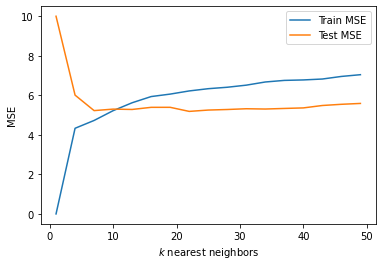

In [ ]:
results_train = []
results_test = []
# for i in range(...):

for i in range(1, 50, 3):
    knn = neighbors.KNeighborsRegressor(n_neighbors = i, metric = 'euclidean')
    # Fit
    knn.fit(X_train, y_train)
    # Predict train
    y_train_pred = knn.predict(X_train)
    # Predict test
    y_test_pred = knn.predict(X_test)
    # MSE train
    results_train.append(mean_squared_error(y_train_pred, y_train))
    # MSE test
    results_test.append(mean_squared_error(y_test_pred, y_test))

import matplotlib.pyplot as plt

plt.plot(range(1, 50, 3), results_train) # training MSEs
plt.plot(range(1, 50, 3), results_test) # test MSEs
plt.ylabel('MSE')
plt.xlabel('$k$ nearest neighbors')
plt.legend(['Train MSE', 'Test MSE'])